# 필요 패키지 import

In [1]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
 
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from catboost import Pool,CatBoostClassifier

from typing import List ,Dict, Tuple

# 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

code_d = pd.read_csv('속성_D_코드.csv')
code_h = pd.read_csv('속성_H_코드.csv')
code_l = pd.read_csv('속성_L_코드.csv')

In [3]:
train.shape, test.shape

((501951, 35), (46404, 34))

In [4]:
code_d.shape, code_h.shape, code_l.shape

((1114, 5), (294, 3), (2025, 5))

# 데이터 확인

In [5]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [6]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [7]:
code_d.head()

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1


In [8]:
code_h.head()

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3


In [9]:
code_l.head()

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,1,1,1,1,2004
1,2,2,2,1,2004
2,3,3,2,1,2004
3,4,3,2,1,2004
4,5,5,2,1,2004


In [10]:
code_d.columns= ["attribute_d","attribute_d_d","attribute_d_s","attribute_d_m","attribute_d_l"]
code_h.columns= ["attribute_h","attribute_h_m", "attribute_h_l"]
code_l.columns= ["attribute_l","attribute_l_d","attribute_l_s","attribute_l_m","attribute_l_l"]

# EDA

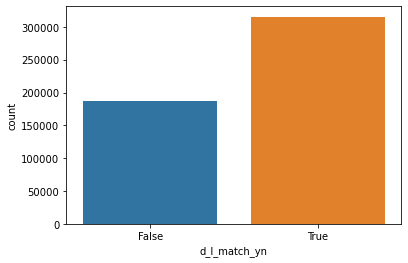

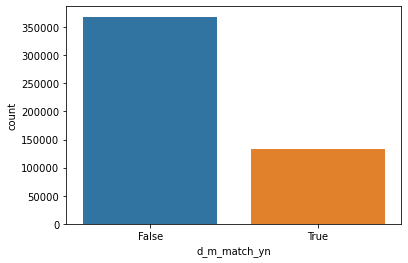

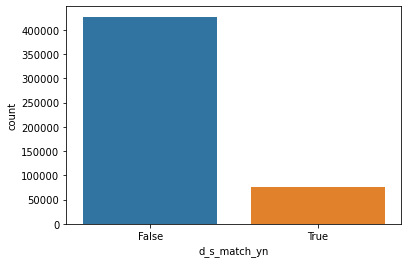

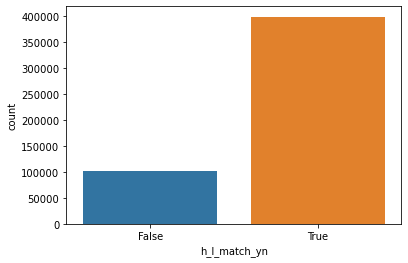

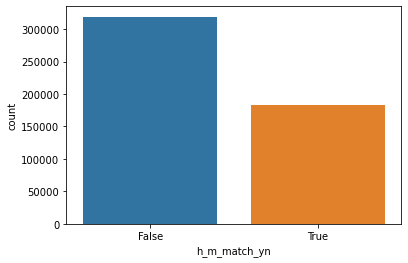

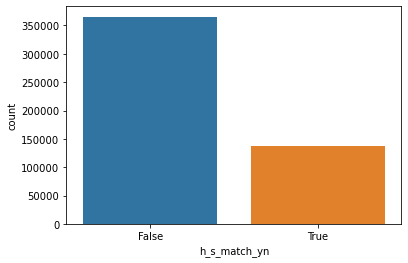

In [11]:
# 전체 EDA
train_plt = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn']
for i in range(len(train_plt)):
    sns.countplot(x=train_plt[i], data = train)
    plt.show()

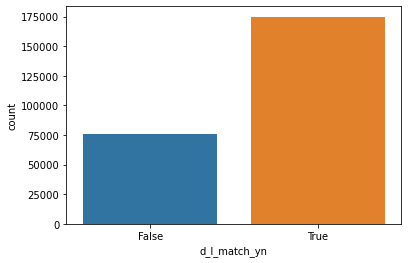

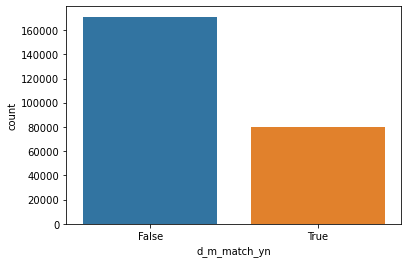

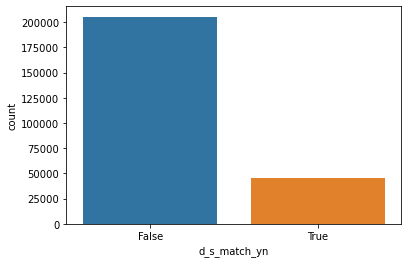

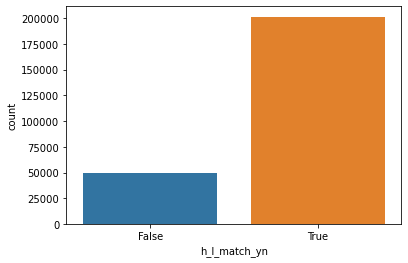

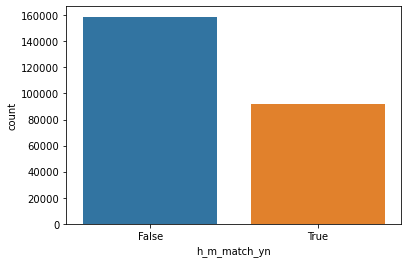

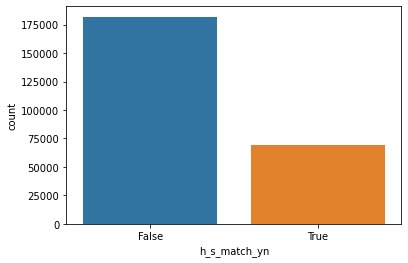

In [12]:
# target==1 만 EDA
train_plt = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn']
for i in range(len(train_plt)):
    sns.countplot(x=train_plt[i], data = train[train.target == 1])
    plt.show()

# Feature Engineering

In [13]:
# # 날짜 컬럼 -> datetime형
# train['contents_open_dt'] = pd.to_datetime(train['contents_open_dt'])
# test['contents_open_dt'] = pd.to_datetime(test['contents_open_dt'])

In [14]:
# # 월, 일, 시간, 요일
# train['month'] = pd.DatetimeIndex(train['contents_open_dt']).month
# train['day'] = pd.DatetimeIndex(train['contents_open_dt']).day
# train['hour'] = pd.DatetimeIndex(train['contents_open_dt']).hour
# train['dayofweek'] = train['contents_open_dt'].dt.dayofweek

# test['month'] = pd.DatetimeIndex(test['contents_open_dt']).month
# test['day'] = pd.DatetimeIndex(test['contents_open_dt']).day
# test['hour'] = pd.DatetimeIndex(test['contents_open_dt']).hour
# test['dayofweek'] = test['contents_open_dt'].dt.dayofweek

In [15]:
# # 월, 일, 시간, 요일 EDA
# train_plt = train_plt = ['month', 'day', 'hour', 'dayofweek']
# for i in range(len(train_plt)):
#     sns.countplot(x=train_plt[i], data = train[train.target == 1])
#     plt.show()
    
# # hour: 3파트
# # dayofweek: 평일/주말 여부

In [16]:
# # 시간대
# train['hourly'] = train['hour'].apply(lambda x: 0 if (x>=0) and (x<9)
#                                       else 1 if (x>=9) and (x<19)
#                                       else 2)
# test['hourly'] = test['hour'].apply(lambda x: 0 if (x>=0) and (x<9)
#                                     else 1 if (x>=9) and (x<19)
#                                     else 2)

In [17]:
# # 평일 주말 여부
# train['weekdays_weekends'] = train['dayofweek'].apply(lambda x: 1 if (x>=0) and (x<5) else 0)
# test['weekdays_weekends'] = test['dayofweek'].apply(lambda x: 1 if (x>=0) and (x<5) else 0)

In [18]:
# # 월, 일, 시간, 요일 제거
# train.drop(['month', 'day', 'hour', 'dayofweek'], axis = 1, inplace = True)
# test.drop(['month', 'day', 'hour', 'dayofweek'], axis = 1, inplace = True)

In [19]:
# whether feature: 여부 변수들의 합
train['whether'] = train.iloc[:, 1:6].sum(axis=1)
test['whether'] = test.iloc[:, 1:6].sum(axis=1)

In [20]:
# whether_id: 여부 변수들의 str 합으로 id 도출
train['whether_id'] = train['d_l_match_yn'].astype(int).astype(str)
test['whether_id'] = test['d_l_match_yn'].astype(int).astype(str)

for i in range(2,7):
    train['whether_id'] += train.iloc[:, i].astype(int).astype(str)
    test['whether_id'] += test.iloc[:, i].astype(int).astype(str)

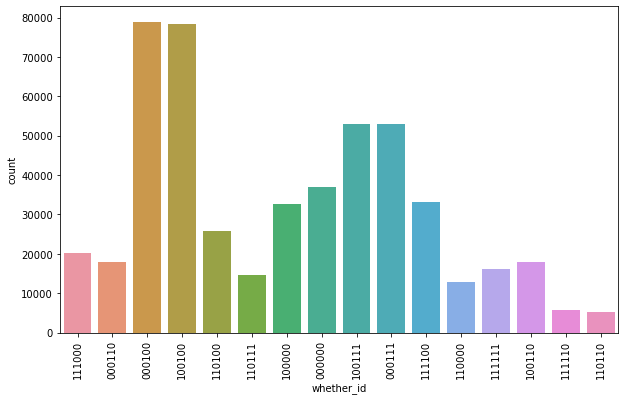

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'whether_id', data = train)
plt.xticks(rotation=90)
plt.show()

In [22]:
from category_encoders.ordinal import OrdinalEncoder
encoder = OrdinalEncoder('whether_id')
train['whether_id'] = encoder.fit_transform(train['whether_id'], train['target'])
test['whether_id'] = encoder.transform(test['whether_id'])

train['whether_id'] = train['whether_id'].astype('int64')
test['whether_id'] = test['whether_id'].astype('int64')

In [23]:
def merge_codes(df:pd.DataFrame,df_code:pd.DataFrame,col:str)->pd.DataFrame:
    df = df.copy()
    df_code = df_code.copy()
    df_code = df_code.add_prefix(f"{col}_")
    df_code.columns.values[0] = col
    return pd.merge(df,df_code,how="left",on=col)

In [24]:
def preprocess_data(
                    df:pd.DataFrame,is_train:bool = True, cols_merge:List[Tuple[str,pd.DataFrame]] = []  , cols_equi:List[Tuple[str,str]]= [] ,
                    cols_drop:List[str] = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt"]
                    )->Tuple[pd.DataFrame,np.ndarray]:
    df = df.copy()

    y_data = None
    if is_train:
        y_data = df["target"].to_numpy()
        df = df.drop(columns="target")

    for col, df_code in cols_merge:
        df = merge_codes(df,df_code,col)

    cols = df.select_dtypes(bool).columns.tolist()
    df[cols] = df[cols].astype(int)

    for col1, col2 in cols_equi:
        df[f"{col1}_{col2}"] = (df[col1] == df[col2] ).astype(int)

    df = df.drop(columns=cols_drop)
    return (df , y_data)

In [25]:
# 소분류 중분류 대분류 속성코드 merge 컬럼명 및 데이터 프레임 리스트
cols_merge = [
              ("person_prefer_d_1" , code_d),
              ("person_prefer_d_2" , code_d),
              ("person_prefer_d_3" , code_d),
              ("contents_attribute_d" , code_d),
              ("person_prefer_h_1" , code_h),
              ("person_prefer_h_2" , code_h),
              ("person_prefer_h_3" , code_h),
              ("contents_attribute_h" , code_h),
              ("contents_attribute_l" , code_l),
]

# 회원 속성과 콘텐츠 속성의 동일한 코드 여부에 대한 컬럼명 리스트
cols_equi = [

    ("contents_attribute_c","person_prefer_c"),
    ("contents_attribute_e","person_prefer_e"),

    ("person_prefer_d_2_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_2_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_2_attribute_d_l" , "contents_attribute_d_attribute_d_l"),
    ("person_prefer_d_3_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_3_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_3_attribute_d_l" , "contents_attribute_d_attribute_d_l"),

    ("person_prefer_h_1_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_1_attribute_h_l" , "contents_attribute_h_attribute_h_l"),
    ("person_prefer_h_2_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_2_attribute_h_l" , "contents_attribute_h_attribute_h_l"),
    ("person_prefer_h_3_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_3_attribute_h_l" , "contents_attribute_h_attribute_h_l"),    
]

# 학습에 필요없는 컬럼 리스트
cols_drop = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt", "contents_rn", ]

In [26]:
x_train, y_train = preprocess_data(train, cols_merge = cols_merge, cols_equi= cols_equi, cols_drop = cols_drop)
x_test, _ = preprocess_data(test,is_train = False, cols_merge = cols_merge, cols_equi= cols_equi, cols_drop = cols_drop)
x_train.shape , y_train.shape , x_test.shape

((501951, 73), (501951,), (46404, 73))

In [27]:
pd.set_option('display.max_row', 500)

is_same_df = pd.DataFrame(columns=['column', 'x_train nunique', 'x_test nunique', '차이'])

for i in x_test.columns:
    is_same_df = is_same_df.append(pd.DataFrame([[i, x_train[i].nunique(), x_test[i].nunique(), x_train[i].nunique() - x_test[i].nunique()]], 
                                                columns=['column', 'x_train nunique', 'x_test nunique', '차이']), ignore_index=True)
display(is_same_df)

,column,x_train nunique,x_test nunique,차이
0,d_l_match_yn,2,2,0
1,d_m_match_yn,2,2,0
2,d_s_match_yn,2,2,0
3,h_l_match_yn,2,2,0
4,h_m_match_yn,2,2,0
5,h_s_match_yn,2,2,0
6,person_attribute_a,2,2,0
7,person_attribute_a_1,8,8,0
8,person_attribute_b,6,6,0
9,person_prefer_c,5,5,0


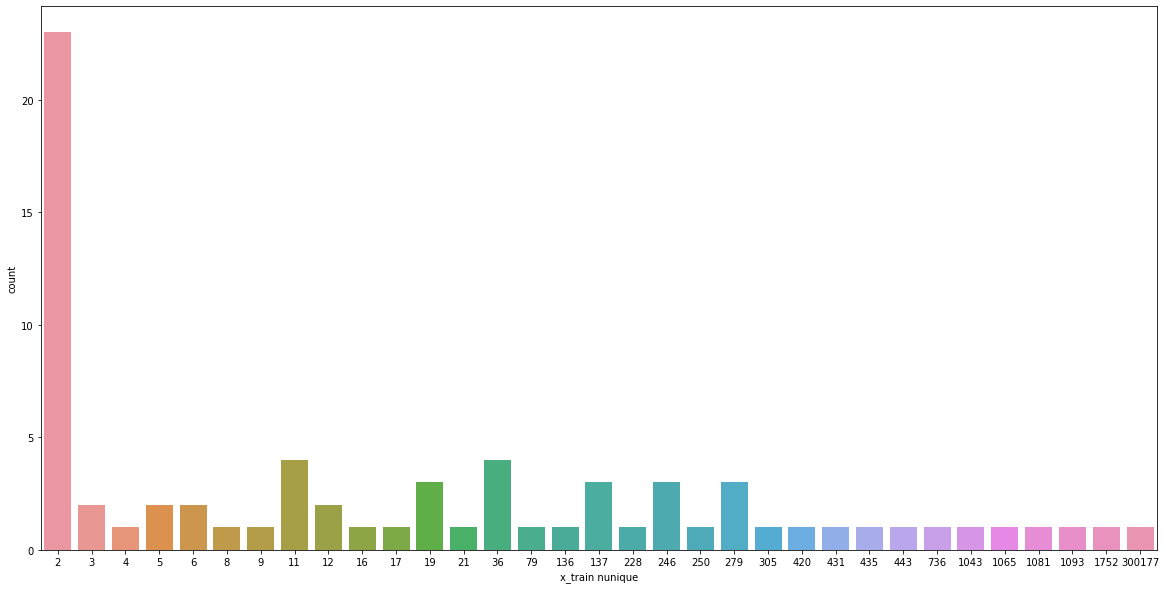

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x = is_same_df['x_train nunique'], data = is_same_df)
plt.show()

In [29]:
x_train.drop('person_rn', axis = 1, inplace = True)
x_test.drop('person_rn', axis = 1, inplace = True)

In [31]:
total_col = []

for i in x_train.columns:
    if (x_train[i].nunique() < 13):
        total_col.append(i)
        print(i, sorted(list(x_train[i].unique())))

d_l_match_yn [0, 1]
d_m_match_yn [0, 1]
d_s_match_yn [0, 1]
h_l_match_yn [0, 1]
h_m_match_yn [0, 1]
h_s_match_yn [0, 1]
person_attribute_a [1, 2]
person_attribute_a_1 [0, 1, 2, 3, 4, 5, 6, 7]
person_attribute_b [0, 1, 2, 3, 4, 5]
person_prefer_c [1, 2, 3, 4, 5]
person_prefer_e [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
contents_attribute_i [1, 2, 3]
contents_attribute_a [1, 2, 3]
contents_attribute_j_1 [1, 2, 3, 4, 5, 6, 8, 9, 10]
contents_attribute_j [1, 2]
contents_attribute_c [1, 2, 3, 4]
contents_attribute_k [1, 2]
contents_attribute_m [1, 2, 3, 4, 5]
contents_attribute_e [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
whether [0, 1, 2, 3, 4, 5]
person_prefer_d_1_attribute_d_l [1, 216, 377, 482, 522, 618, 744, 864, 926, 1235, 1258]
person_prefer_d_2_attribute_d_l [1, 216, 377, 482, 522, 618, 744, 864, 926, 1235, 1258]
person_prefer_d_3_attribute_d_l [1, 216, 377, 482, 522, 618, 744, 864, 926, 1235, 1258]
contents_attribute_d_attribute_d_l [1, 216, 377, 482, 522, 618, 744, 864, 926, 1235, 1258]


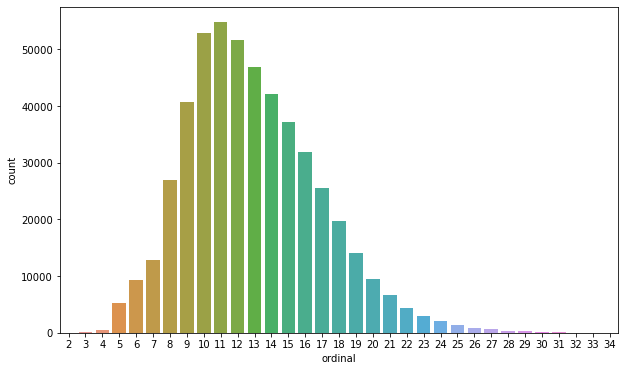

In [32]:
# ordinal feature: 레이아웃 pdf에 순서에 차이가 의미가 있다는 변수들의 합
ordinal_col = ['person_attribute_a_1', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']

x_train['ordinal'] = x_train[ordinal_col].sum(axis=1)
x_test['ordinal'] = x_test[ordinal_col].sum(axis=1)

plt.figure(figsize=(10,6))
sns.countplot(x = 'ordinal', data = x_train)
plt.show()

In [33]:
# kmean feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=35, random_state=42).fit(x_train)
x_train['cluster'] = kmeans.predict(x_train)
x_test['cluster'] = kmeans.predict(x_test)

In [34]:
x_train.shape , y_train.shape , x_test.shape

((501951, 74), (501951,), (46404, 74))

# 모델 학습

Catboost를 이용한 학습

In [35]:
cat_features = x_train.columns[x_train.nunique() > 2].tolist()
print(cat_features)
print(len(cat_features))

['person_attribute_a_1', 'person_attribute_b', 'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_c', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h', 'whether', 'whether_id', 'person_prefer_d_1_attribute_d_d', 'person_prefer_d_1_attribute_d_s', 'person_prefer_d_1_attribute_d_m', 'person_prefer_d_1_attribute_d_l', 'person_prefer_d_2_attribute_d_d', 'person_prefer_d_2_attribute_d_s', 'person_prefer_d_2_attribute_d_m', 'person_prefer_d_2_attribute_d_l', 'person_prefer_d_3_attribute_d_d', 'person_prefer_d_3_attribute_d_s', 'person_prefer_d_3_attribute_d_m', 'person_prefer_d_3_attribute_d_l', 'contents_attribute_d_attribute_d_d', 'contents_attribute_d_attribute_d_s', 'contents_attribute_d_attribute_d_m', 'contents_at

In [36]:
# cat_features 에서 ordinal 변수 제거
cat_features.remove('ordinal')
print(len(cat_features))

50


In [37]:
SEED = 42
is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [38]:
scores = []
models = []


models = []
for tri, vai in cv.split(x_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations, random_state=SEED, eval_metric="F1", cat_features=cat_features, one_hot_max_size=4)
    model.fit(x_train.iloc[tri], y_train[tri], 
            eval_set=[(x_train.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

Learning rate set to 0.086395
0:	learn: 0.5911410	test: 0.5951872	best: 0.5951872 (0)	total: 1.56s	remaining: 1h 17m 52s
100:	learn: 0.6558736	test: 0.6842503	best: 0.6842503 (100)	total: 3m 18s	remaining: 1h 34m 57s
200:	learn: 0.6641523	test: 0.6900614	best: 0.6900614 (200)	total: 6m 29s	remaining: 1h 30m 17s
300:	learn: 0.6685144	test: 0.6927550	best: 0.6928947 (294)	total: 9m 53s	remaining: 1h 28m 45s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6933084809
bestIteration = 339

Shrink model to first 340 iterations.
Learning rate set to 0.086395
0:	learn: 0.6317131	test: 0.6345682	best: 0.6345682 (0)	total: 1.35s	remaining: 1h 7m 36s
100:	learn: 0.6576414	test: 0.6824007	best: 0.6824007 (100)	total: 3m 23s	remaining: 1h 37m 12s
200:	learn: 0.6651453	test: 0.6881253	best: 0.6882144 (199)	total: 6m 32s	remaining: 1h 30m 58s
300:	learn: 0.6689504	test: 0.6910969	best: 0.6911136 (295)	total: 9m 56s	remaining: 1h 29m 6s
400:	learn: 0.6717805	test: 0.6923823	best: 0.

In [39]:
print(scores)
print(np.mean(scores))

[0.6933084808946878, 0.6935369318181818, 0.6907912655552946, 0.6906810504115418, 0.6912919343326196]
0.691921932602465


# Feature Importance

In [40]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

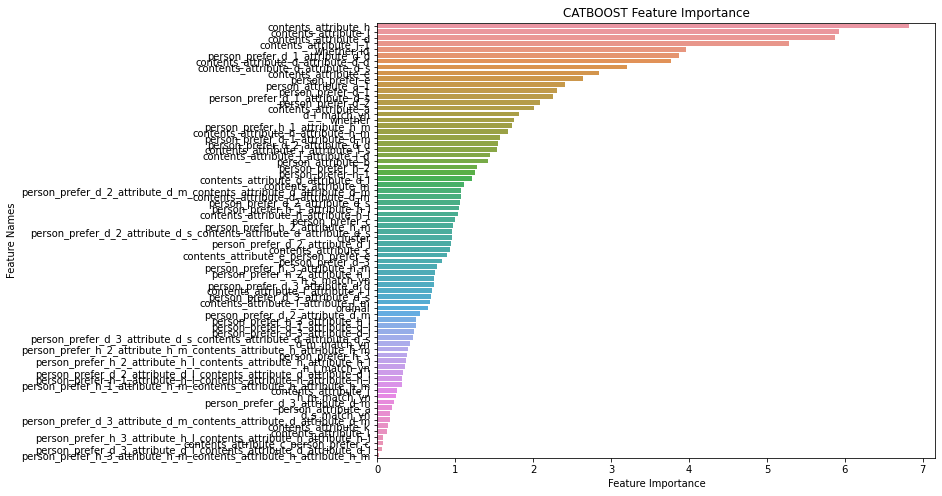

In [41]:
plot_feature_importance(model.get_feature_importance(),x_test.columns,'CATBOOST')

In [42]:
feature_importance = np.array(model.get_feature_importance())
feature_names = np.array(x_test.columns)
    
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fi_df

,feature_names,feature_importance
27,contents_attribute_h,6.823078
23,contents_attribute_l,5.923586
24,contents_attribute_d,5.870596
19,contents_attribute_j_1,5.282608
29,whether_id,3.965641
30,person_prefer_d_1_attribute_d_d,3.865890
42,contents_attribute_d_attribute_d_d,3.767576
43,contents_attribute_d_attribute_d_s,3.205393
26,contents_attribute_e,2.846263
13,person_prefer_e,2.644892


# threshold 0.4

In [43]:
threshold = 0.4

In [44]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.7147390234425592, 0.715877074410045, 0.7144571918507329, 0.7143053879118297, 0.7139631532445433]
0.7146683661719421


In [45]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [46]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred
submission

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [47]:
submission['target'].value_counts()

1    32920
0    13484
Name: target, dtype: int64

In [48]:
submission.to_csv('0128_cat_threshold_0.4_3.csv', index=False)

# threshold 0.37

In [49]:
threshold = 0.37

In [50]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.7142868335487915, 0.715512893260198, 0.7158582296098309, 0.713612812058408, 0.7142223419255692]
0.7146986220805596


In [51]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [52]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred
submission

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [53]:
submission['target'].value_counts()

1    35031
0    11373
Name: target, dtype: int64

In [54]:
submission.to_csv('0128_cat_threshold_0.37_4.csv', index=False)

# threshold 0.38

In [55]:
threshold = 0.38
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.7149743159494392, 0.7159001314060446, 0.7156347367580091, 0.7141304778901447, 0.7145874671958011]
0.7150454258398877


In [56]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [57]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred
submission

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [58]:
submission['target'].value_counts()

1    34333
0    12071
Name: target, dtype: int64

In [59]:
submission.to_csv('0128_cat_threshold_0.38_5.csv', index=False)